# Data Visualization Using Seaborn

![](../image/seaborn-func.png)
(source: [documentation](https://seaborn.pydata.org/tutorial/function_overview.html)

```{note}
Still like the vidualization tools in R better.
Seaborn is not intuitive, esp. for long-wide conversion of data frames.
```

## Two Types of Functions

- Figure-level functions (Generic)
- Axex-level functions (Specific)

In [1]:
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

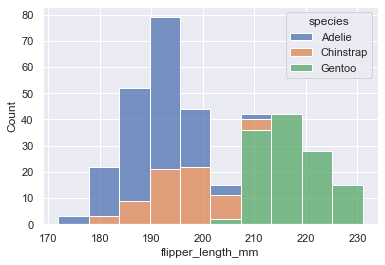

In [3]:
# histogram
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple="stack")

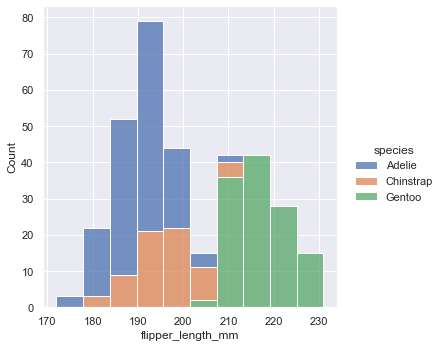

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

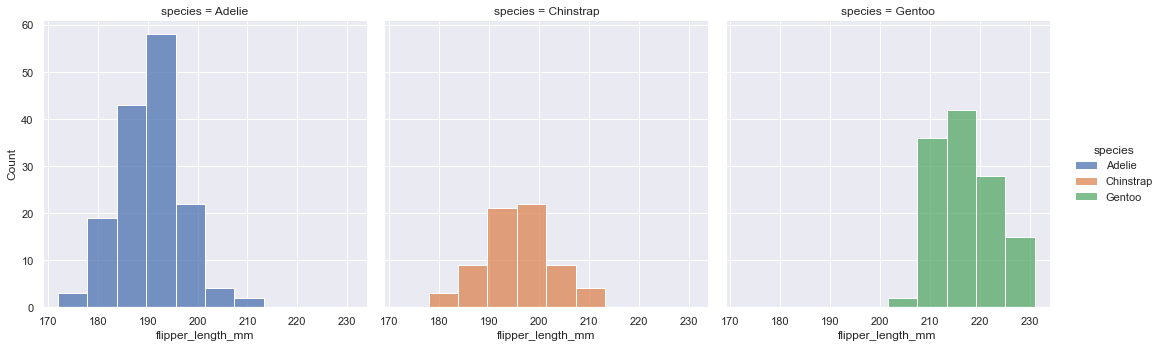

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

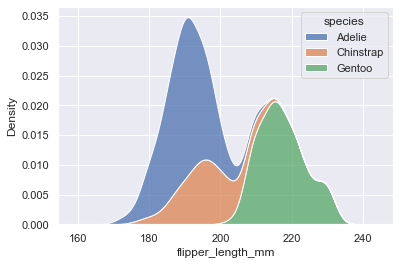

In [6]:
## kernel density plot
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple="stack")

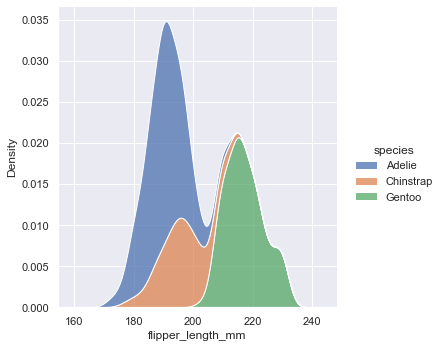

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")


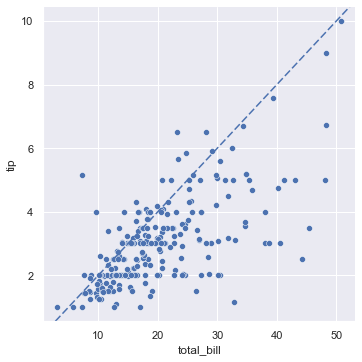

In [8]:
tips = sns.load_dataset("tips")

g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10,2), slope=.2, color="b", dashes=(5,2))

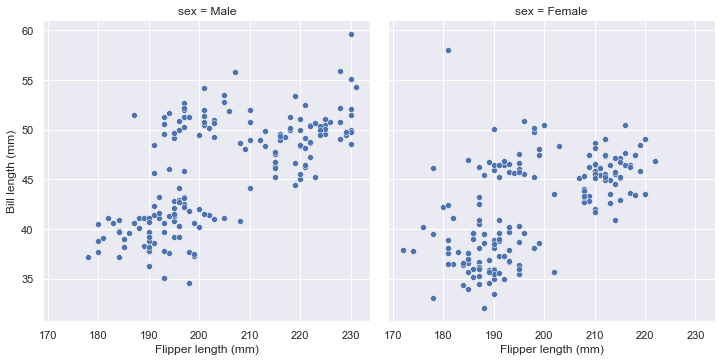

In [9]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

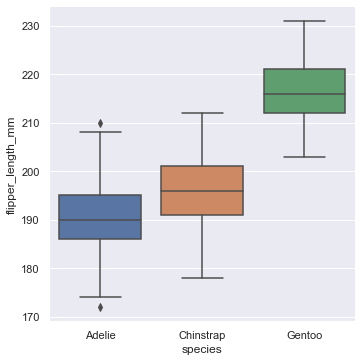

In [10]:
sns.catplot(data=penguins, x='species', y='flipper_length_mm', kind="box")

- `jointplot()`: plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately

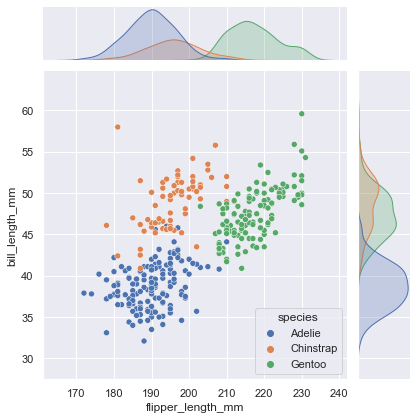

In [11]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

- `pairplot()`: visualizes every pairwise combination of variables simultaneously in a data frame


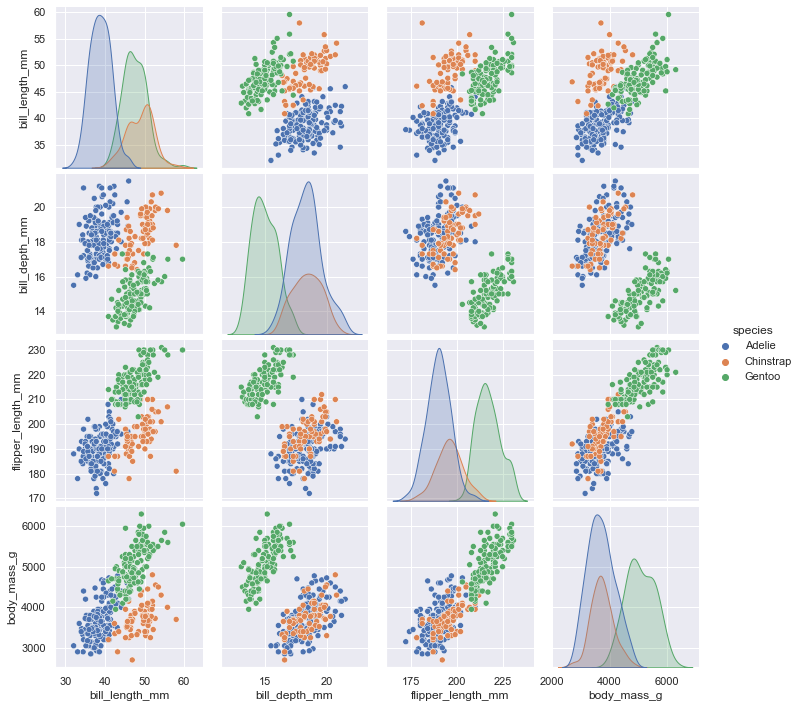

In [12]:
sns.pairplot(data=penguins, hue="species")

## Long-format vs. Wide-format Data

In [13]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


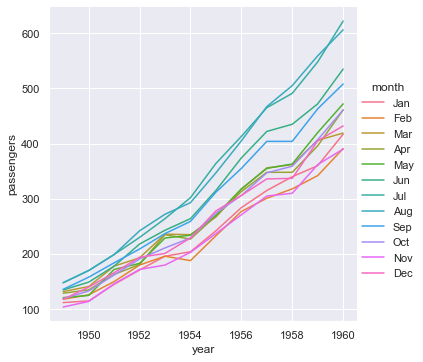

In [14]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")


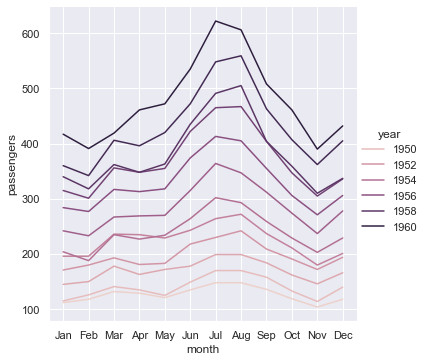

In [15]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

In [16]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [17]:
print(type(flights_wide))

<class 'pandas.core.frame.DataFrame'>


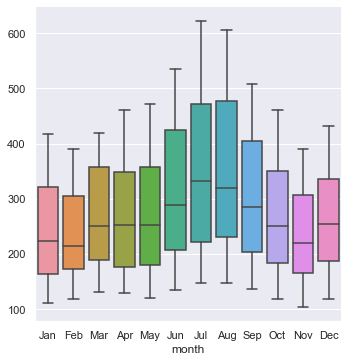

In [18]:
sns.catplot(data=flights_wide, kind="box")